<a href="https://colab.research.google.com/github/Fuad3004/Applying-TinyVGG-/blob/main/Applying_TinyVGG_on_food101_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#Import Data

Here I am importing 5classes out of  101 classes of food 101 datasets which I have created and uploaded into the github. Let's download zip file from here..

https://github.com/Fuad3004/5-Classes-of-Food-101-Dataset/raw/main/5_Classes_of_Food101_Dataset.zip

In [ ]:
import os
import requests
import zipfile
from pathlib import Path

data_path=Path("data/")
image_path=data_path/"5_Classes_of_food_101"


if image_path.is_dir():
  print(f"{image_path} already exists...skipping downloading")

else:
  print(f"{image_path} doesn't exist.. creating one....")
  image_path.mkdir(parents=True, exist_ok=True)

  with open(data_path/"5_Classes_of_Food101_Dataset.zip","wb") as f:
    request=requests.get("https://github.com/Fuad3004/5-Classes-of-Food-101-Dataset/raw/main/5_Classes_of_Food101_Dataset.zip")
    f.write(request.content)

  with zipfile.ZipFile(data_path/ "5_Classes_of_Food101_Dataset.zip","r") as zip_ref:
    print("Scanning...")
    zip_ref.extractall(image_path)

  os.remove(data_path / "5_Classes_of_Food101_Dataset.zip")




data/5_Classes_of_food_101 doesn't exist.. creating one....
Scanning...


#Data Preparatiion and Data Exploration


In [ ]:
import os

def walk_through_dir(dir_path):
  for dirpath,dirnames, filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

In [ ]:
walk_through_dir(image_path)

there are 2 directories and 0 images in data/5_Classes_of_food_101
there are 5 directories and 0 images in data/5_Classes_of_food_101/train
there are 0 directories and 143 images in data/5_Classes_of_food_101/train/chicken_wings
there are 0 directories and 153 images in data/5_Classes_of_food_101/train/pizza
there are 0 directories and 165 images in data/5_Classes_of_food_101/train/waffles
there are 0 directories and 157 images in data/5_Classes_of_food_101/train/cup_cakes
there are 0 directories and 132 images in data/5_Classes_of_food_101/train/ramen
there are 5 directories and 0 images in data/5_Classes_of_food_101/test
there are 0 directories and 58 images in data/5_Classes_of_food_101/test/chicken_wings
there are 0 directories and 42 images in data/5_Classes_of_food_101/test/pizza
there are 0 directories and 40 images in data/5_Classes_of_food_101/test/waffles
there are 0 directories and 55 images in data/5_Classes_of_food_101/test/cup_cakes
there are 0 directories and 55 images i

In [ ]:
image_path

PosixPath('data/5_Classes_of_food_101')

Random image path: data/5_Classes_of_food_101/test/cup_cakes/1016810.jpg
Image class: cup_cakes
Image height: 512
Image width: 384


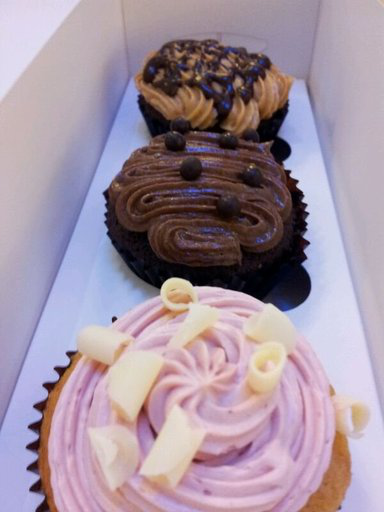

In [ ]:
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path= random.choice(image_path_list)


image_class=random_image_path.parent.stem

img=Image.open(random_image_path)


print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img



In [ ]:
import numpy as np

import matplotlib.pyplot as plt

img_as_array= np.asarray(img)

img_as_array

array([[[215, 207, 228],
        [216, 208, 229],
        [217, 209, 230],
        ...,
        [198, 176, 162],
        [200, 177, 159],
        [204, 181, 163]],

       [[216, 208, 229],
        [217, 209, 230],
        [218, 210, 231],
        ...,
        [202, 183, 168],
        [202, 181, 164],
        [202, 179, 161]],

       [[216, 208, 229],
        [217, 209, 230],
        [218, 210, 231],
        ...,
        [209, 189, 178],
        [206, 184, 170],
        [200, 178, 164]],

       ...,

       [[175, 173, 223],
        [175, 173, 223],
        [176, 174, 224],
        ...,
        [214, 204, 231],
        [214, 204, 231],
        [214, 204, 231]],

       [[174, 172, 222],
        [175, 173, 223],
        [176, 174, 224],
        ...,
        [213, 203, 230],
        [213, 203, 230],
        [213, 203, 230]],

       [[174, 172, 222],
        [174, 172, 222],
        [175, 173, 223],
        ...,
        [213, 203, 230],
        [213, 203, 230],
        [213, 203, 230]]

(-0.5, 383.5, 511.5, -0.5)

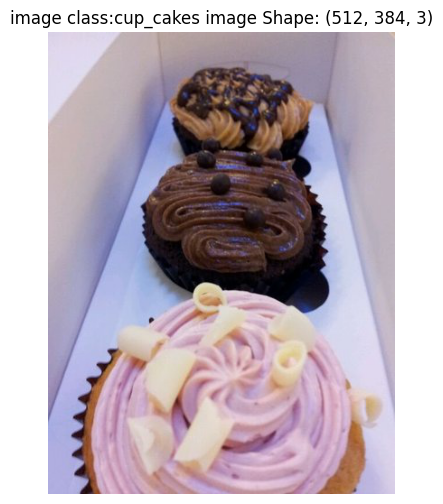

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class} image Shape: {img_as_array.shape}")
plt.axis(False)

#Turn Data in Tensors

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

data_transform= transforms.Compose([
    transforms.Resize(size=(64,64)),

    transforms.RandomHorizontalFlip(p=0.5),

    transforms.ToTensor()
])

data_transform(img)

tensor([[[0.7765, 0.7490, 0.7451,  ..., 0.8706, 0.8588, 0.8549],
         [0.7490, 0.7529, 0.7490,  ..., 0.8745, 0.8706, 0.8667],
         [0.7569, 0.7569, 0.7529,  ..., 0.8824, 0.8784, 0.8784],
         ...,
         [0.8510, 0.8314, 0.8078,  ..., 0.6902, 0.6902, 0.6902],
         [0.8471, 0.8275, 0.7961,  ..., 0.6941, 0.6941, 0.6902],
         [0.8392, 0.8196, 0.7882,  ..., 0.6902, 0.6902, 0.6902]],

        [[0.7098, 0.6980, 0.6941,  ..., 0.8314, 0.8275, 0.8235],
         [0.7020, 0.6980, 0.6980,  ..., 0.8392, 0.8353, 0.8314],
         [0.7098, 0.7020, 0.7020,  ..., 0.8431, 0.8471, 0.8431],
         ...,
         [0.8157, 0.8039, 0.7765,  ..., 0.6824, 0.6824, 0.6824],
         [0.8078, 0.7922, 0.7608,  ..., 0.6863, 0.6863, 0.6824],
         [0.8000, 0.7804, 0.7529,  ..., 0.6824, 0.6824, 0.6824]],

        [[0.7020, 0.7176, 0.7137,  ..., 0.9137, 0.9098, 0.9059],
         [0.7255, 0.7216, 0.7216,  ..., 0.9216, 0.9176, 0.9176],
         [0.7451, 0.7412, 0.7412,  ..., 0.9333, 0.9294, 0.

#original Image Vs transformed image

In [ ]:
def plot_original_transformed_images(image_paths,
                            transform,
                            n=3,
                            seed=None):
  if seed:
    random.seed(seed)

  random_image_paths=random.sample(image_paths, k=n)


  for img_path in random_image_paths:
    with Image.open(img_path) as f:

      fig,ax=plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original /n soze: {f.size}")
      ax[0].axis("off")

      transformed_images=transform(f).permute(1,2,0)
      ax[1].imshow(transformed_images)
      ax[1].set_title(f"Transformed \n size {transformed_images.shape}")
      ax[1].axis("off")

      fig.suptitle(f"Class:{img_path.parent.stem}", fontsize=16)

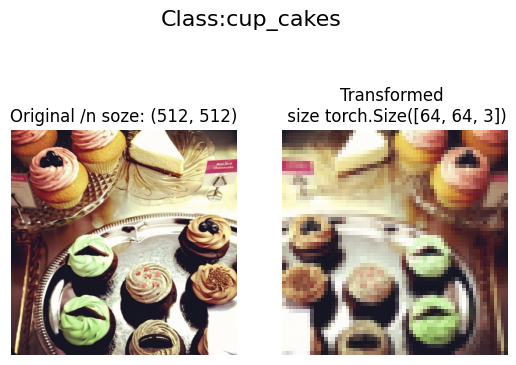

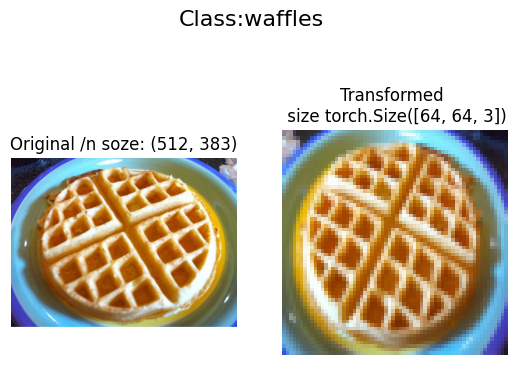

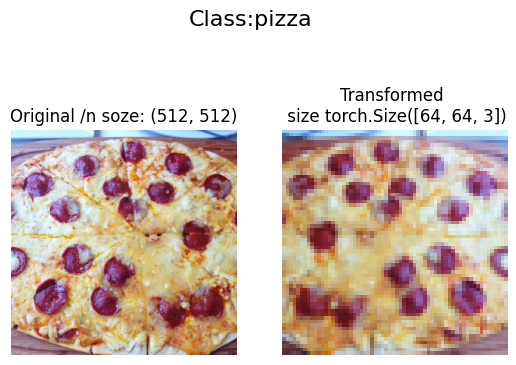

In [ ]:
plot_original_transformed_images(image_paths=image_path_list,
                                transform=data_transform,
                                n=3,
                                seed=50)

# Use ImageFolder to create dataset(s) and turn train and test data into DataLoader


In [ ]:
train_dir=image_path/"train"
test_dir=image_path/"test"

In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 750
    Root location: data/5_Classes_of_food_101/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 250
    Root location: data/5_Classes_of_food_101/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names= train_data.classes

class_names

['chicken_wings', 'cup_cakes', 'pizza', 'ramen', 'waffles']

In [ ]:
class_dict =train_data.class_to_idx
class_dict

{'chicken_wings': 0, 'cup_cakes': 1, 'pizza': 2, 'ramen': 3, 'waffles': 4}

In [ ]:
img, label=train_data[0][0], train_data[0][1]
img


tensor([[[0.2118, 0.1137, 0.0627,  ..., 0.1020, 0.1020, 0.1098],
         [0.2392, 0.1529, 0.0745,  ..., 0.1137, 0.1137, 0.1176],
         [0.2471, 0.2000, 0.0980,  ..., 0.1098, 0.1098, 0.1137],
         ...,
         [0.3255, 0.3333, 0.3373,  ..., 0.1412, 0.1373, 0.1294],
         [0.3294, 0.3333, 0.3373,  ..., 0.1373, 0.1294, 0.1216],
         [0.3176, 0.3294, 0.3373,  ..., 0.1412, 0.1294, 0.1255]],

        [[0.2275, 0.1216, 0.0588,  ..., 0.2118, 0.2039, 0.2000],
         [0.2745, 0.1765, 0.0824,  ..., 0.2196, 0.2157, 0.2118],
         [0.2980, 0.2392, 0.1137,  ..., 0.2275, 0.2235, 0.2235],
         ...,
         [0.3569, 0.3608, 0.3686,  ..., 0.2980, 0.2941, 0.2824],
         [0.3490, 0.3529, 0.3647,  ..., 0.2941, 0.2863, 0.2745],
         [0.3451, 0.3490, 0.3569,  ..., 0.2941, 0.2902, 0.2784]],

        [[0.2235, 0.1294, 0.0627,  ..., 0.3843, 0.3765, 0.3725],
         [0.2627, 0.1725, 0.0784,  ..., 0.3804, 0.3765, 0.3765],
         [0.3020, 0.2549, 0.1255,  ..., 0.3725, 0.3804, 0.

In [ ]:
label

0

In [ ]:
class_names[label]

'chicken_wings'

In [ ]:
img_permute=img.permute(1,2,0)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


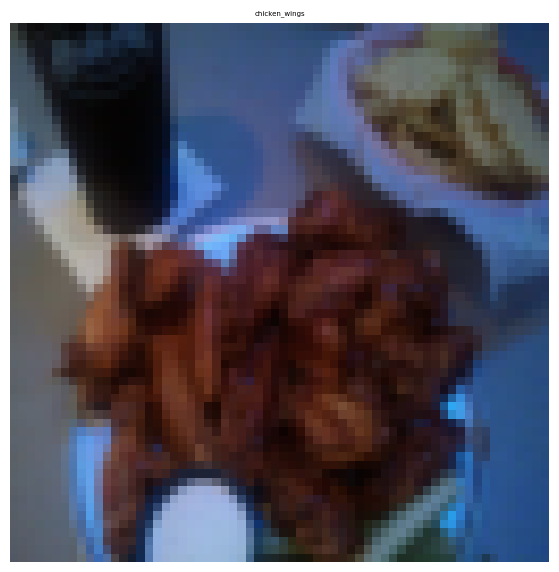

In [ ]:
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=5);

* Turn train and test data into DataLoader

In [ ]:
import os
os.cpu_count()

2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKER=os.cpu_count()
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=NUM_WORKER, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKER,
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f27a51e6f80>,
 <torch.utils.data.dataloader.DataLoader at 0x7f286cac9660>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(24, 8)

#Use TinyVGG and create a Model

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int)-> None:
    super().__init__()

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )


    self.classifier= nn.Sequential(
          nn.Flatten(),
          nn.Linear(
              in_features=hidden_units*13*13,  #number will be calcualted... tricky one!
              out_features=output_shape)
    )

  def forward (self, x:torch.Tensor):
    x=self.conv_block_1(x)
    print(x.shape) #need this to understand the matrics dimentions
    x=self.conv_block_2(x)
    print(x.shape)
    x=self.classifier(x)

    return x


In [ ]:
model0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)
#input_shpae=no of color channnels.
model0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=5, bias=True)
  )
)

#Try a forward pass on a single image (to test the model)




---
Need this to setup the hidden items


---



In [ ]:
img_batch, label_batch = next(iter(train_dataloader))
img_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
model0(img_batch.to(device)) #put this in this way to understand

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])


RuntimeError: ignored

In [ ]:
model0(img_batch.to(device))

tensor([[ 0.0153, -0.0252,  0.0213,  0.0265,  0.0635],
        [ 0.0192, -0.0241,  0.0175,  0.0237,  0.0624],
        [ 0.0191, -0.0291,  0.0189,  0.0285,  0.0666],
        [ 0.0136, -0.0239,  0.0178,  0.0240,  0.0698],
        [ 0.0151, -0.0224,  0.0179,  0.0264,  0.0677],
        [ 0.0177, -0.0259,  0.0168,  0.0228,  0.0683],
        [ 0.0121, -0.0278,  0.0213,  0.0285,  0.0655],
        [ 0.0174, -0.0216,  0.0172,  0.0216,  0.0633],
        [ 0.0176, -0.0244,  0.0167,  0.0238,  0.0628],
        [ 0.0197, -0.0297,  0.0157,  0.0224,  0.0682],
        [ 0.0150, -0.0258,  0.0223,  0.0247,  0.0661],
        [ 0.0152, -0.0297,  0.0192,  0.0281,  0.0684],
        [ 0.0213, -0.0293,  0.0131,  0.0226,  0.0701],
        [ 0.0187, -0.0265,  0.0172,  0.0236,  0.0571],
        [ 0.0103, -0.0284,  0.0214,  0.0283,  0.0602],
        [ 0.0134, -0.0256,  0.0115,  0.0285,  0.0635],
        [ 0.0202, -0.0248,  0.0162,  0.0253,  0.0673],
        [ 0.0175, -0.0300,  0.0151,  0.0317,  0.0683],
        [ 

In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single =img_batch[0].unsqueeze(dim=0),label_batch[0] #select one image from train dataloader
print(f"Single Image Shape:{img_single.shape}\n")

model0.eval()
with torch.inference_mode():
  pred=model0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")



Single Image Shape:torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0164, -0.0233,  0.0144,  0.0231,  0.0673]])

Output prediction probabilities:
tensor([[0.1993, 0.1915, 0.1989, 0.2006, 0.2097]])

Output prediction label:
tensor([4])

Actual label:
3


In [ ]:
# Install torchinfo if it's not available, import it if it is
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.10/dist-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/usr/local/lib/python3.10/dist-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 5]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

#TRAIN Loop

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

#Test Loop

In [ ]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

NameError: ignored

#Combined train and test loop

In [ ]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

#Evaluation of Model_0

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6157 | train_acc: 0.1886 | test_loss: 1.6049 | test_acc: 0.2266
Epoch: 2 | train_loss: 1.6091 | train_acc: 0.2000 | test_loss: 1.6096 | test_acc: 0.1797
Epoch: 3 | train_loss: 1.5952 | train_acc: 0.2206 | test_loss: 1.5792 | test_acc: 0.2957
Epoch: 4 | train_loss: 1.5132 | train_acc: 0.3183 | test_loss: 1.4545 | test_acc: 0.4008
Epoch: 5 | train_loss: 1.4466 | train_acc: 0.3726 | test_loss: 1.4188 | test_acc: 0.4312
Total training time: 60.762 seconds


#PLot

In [ ]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

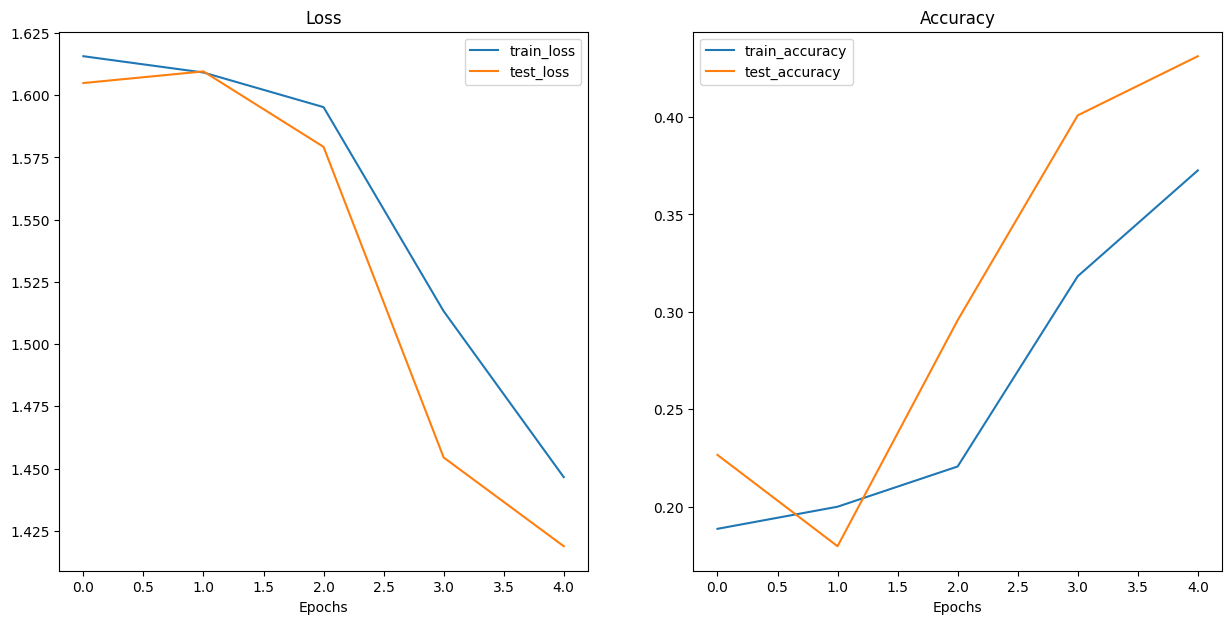

In [ ]:
plot_loss_curves(model_0_results)

In [ ]:
#OVerfitting Issue and too poor accuracy with TinyVGG model........Lets try another way